In [2]:
# Import Packages
import pandas as pd
import numpy as np

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Algorithms
import xgboost as xgb
import sklearn.tree as tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [37]:
# Import The Data from: (https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)
df = pd.read_csv("fetal_health.csv")

### Basic Info about the Data

In [5]:
# Number of Rows
len(df)

2126

In [6]:
# First Look at the Data
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions   
0           120.0          0.000             0.0                 0.000  \
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations   
0                0.000                   0.0                       0.0  \
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability   
0                             73.0                                   0.5  \
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min   
0                                               43.0       ...           62.0  \
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes   
0          126.0                        2.0                         0.0  \
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance   
0           120.0           137.0             121.0                73.0  \
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [7]:
df.describe().T

count        mean   
baseline value                                      2126.0  133.303857  \
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%   
baseline value                                       9.840844  106.0  126.000  \
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Number of Non-null rows equals row count for all columns. So we are dealing with a Dataset with no missing Data.

In [9]:
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

All the columns vary so, each may be of use for prediction.

### Information about the dependent variable

In [10]:
var_count = df.groupby(df["fetal_health"])["fetal_health"].count()
# Count of each category
var_count

fetal_health
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

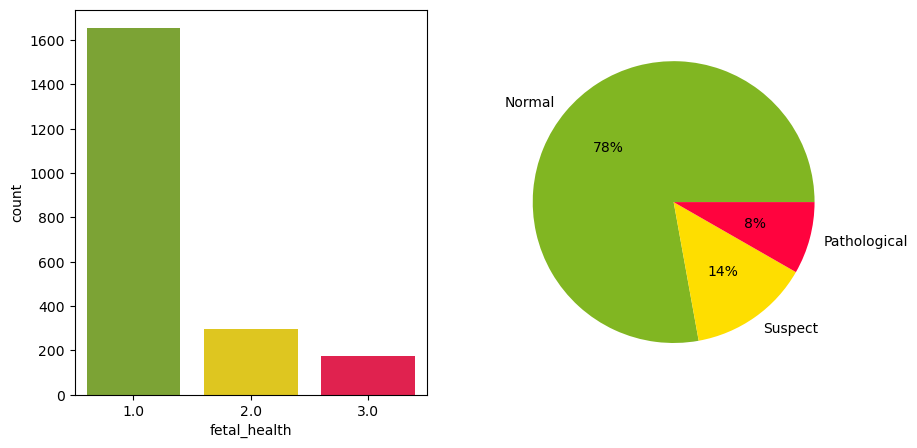

In [11]:
# Color Palette
colors2 = ["#81b622", "#fede00", "#ff033e"]
plt.figure(figsize=(10, 5))

# Barplot
plt.subplot(121)
sns.countplot(x="fetal_health", data=df, palette=colors2)

# Pie chart
plt.subplot(122)
plt.pie(var_count, labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%", colors=colors2)

plt.show()

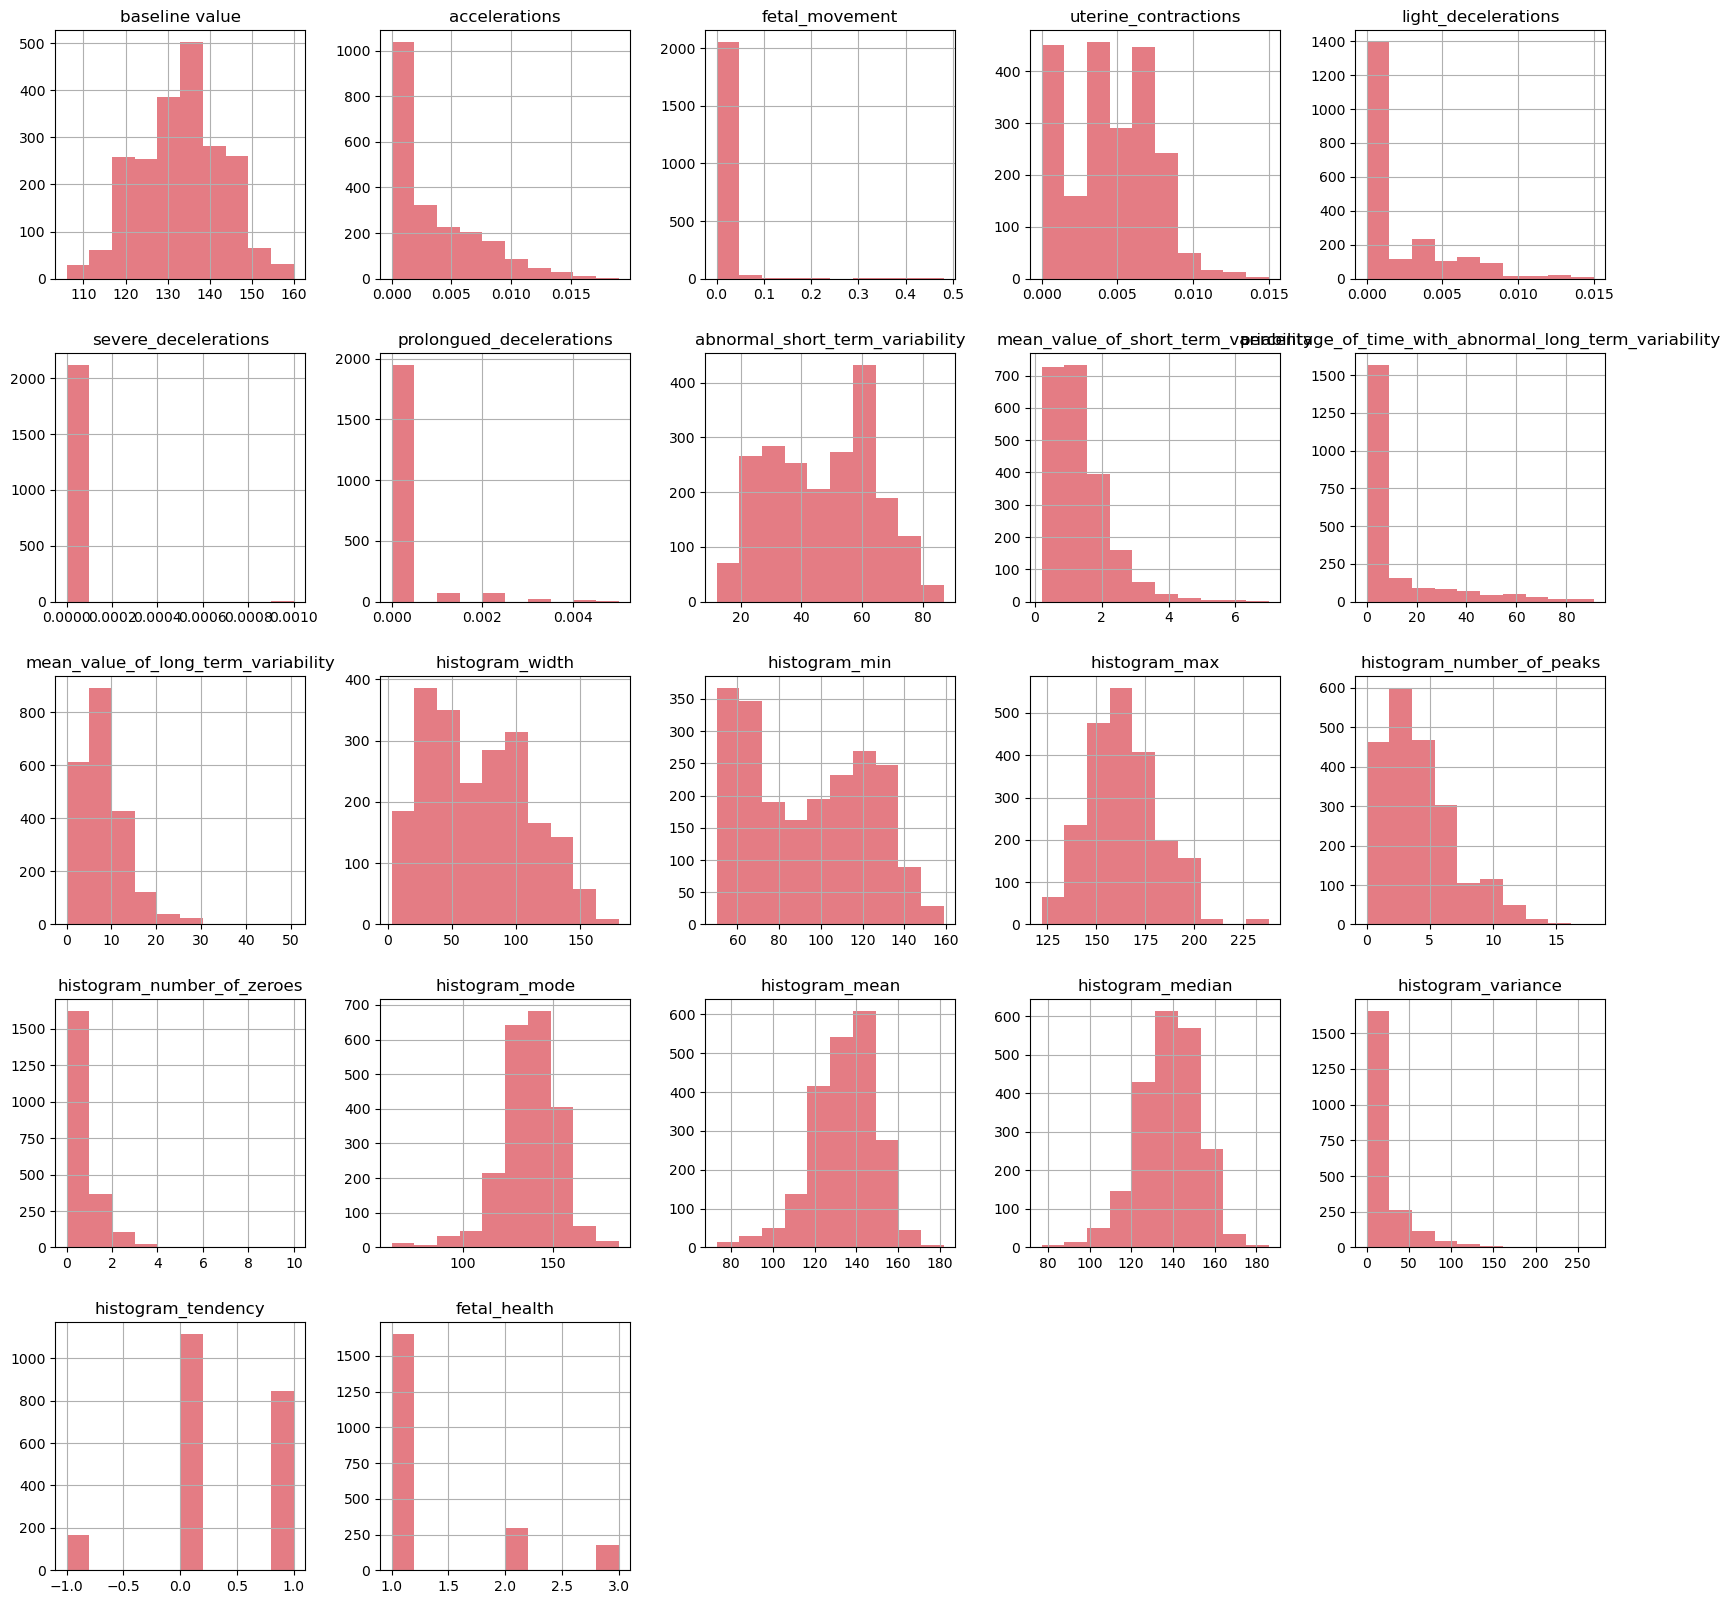

In [12]:
# Histograms of each variable
data_hist_plot = df.hist(figsize = (20,20), color = "#e47c84")

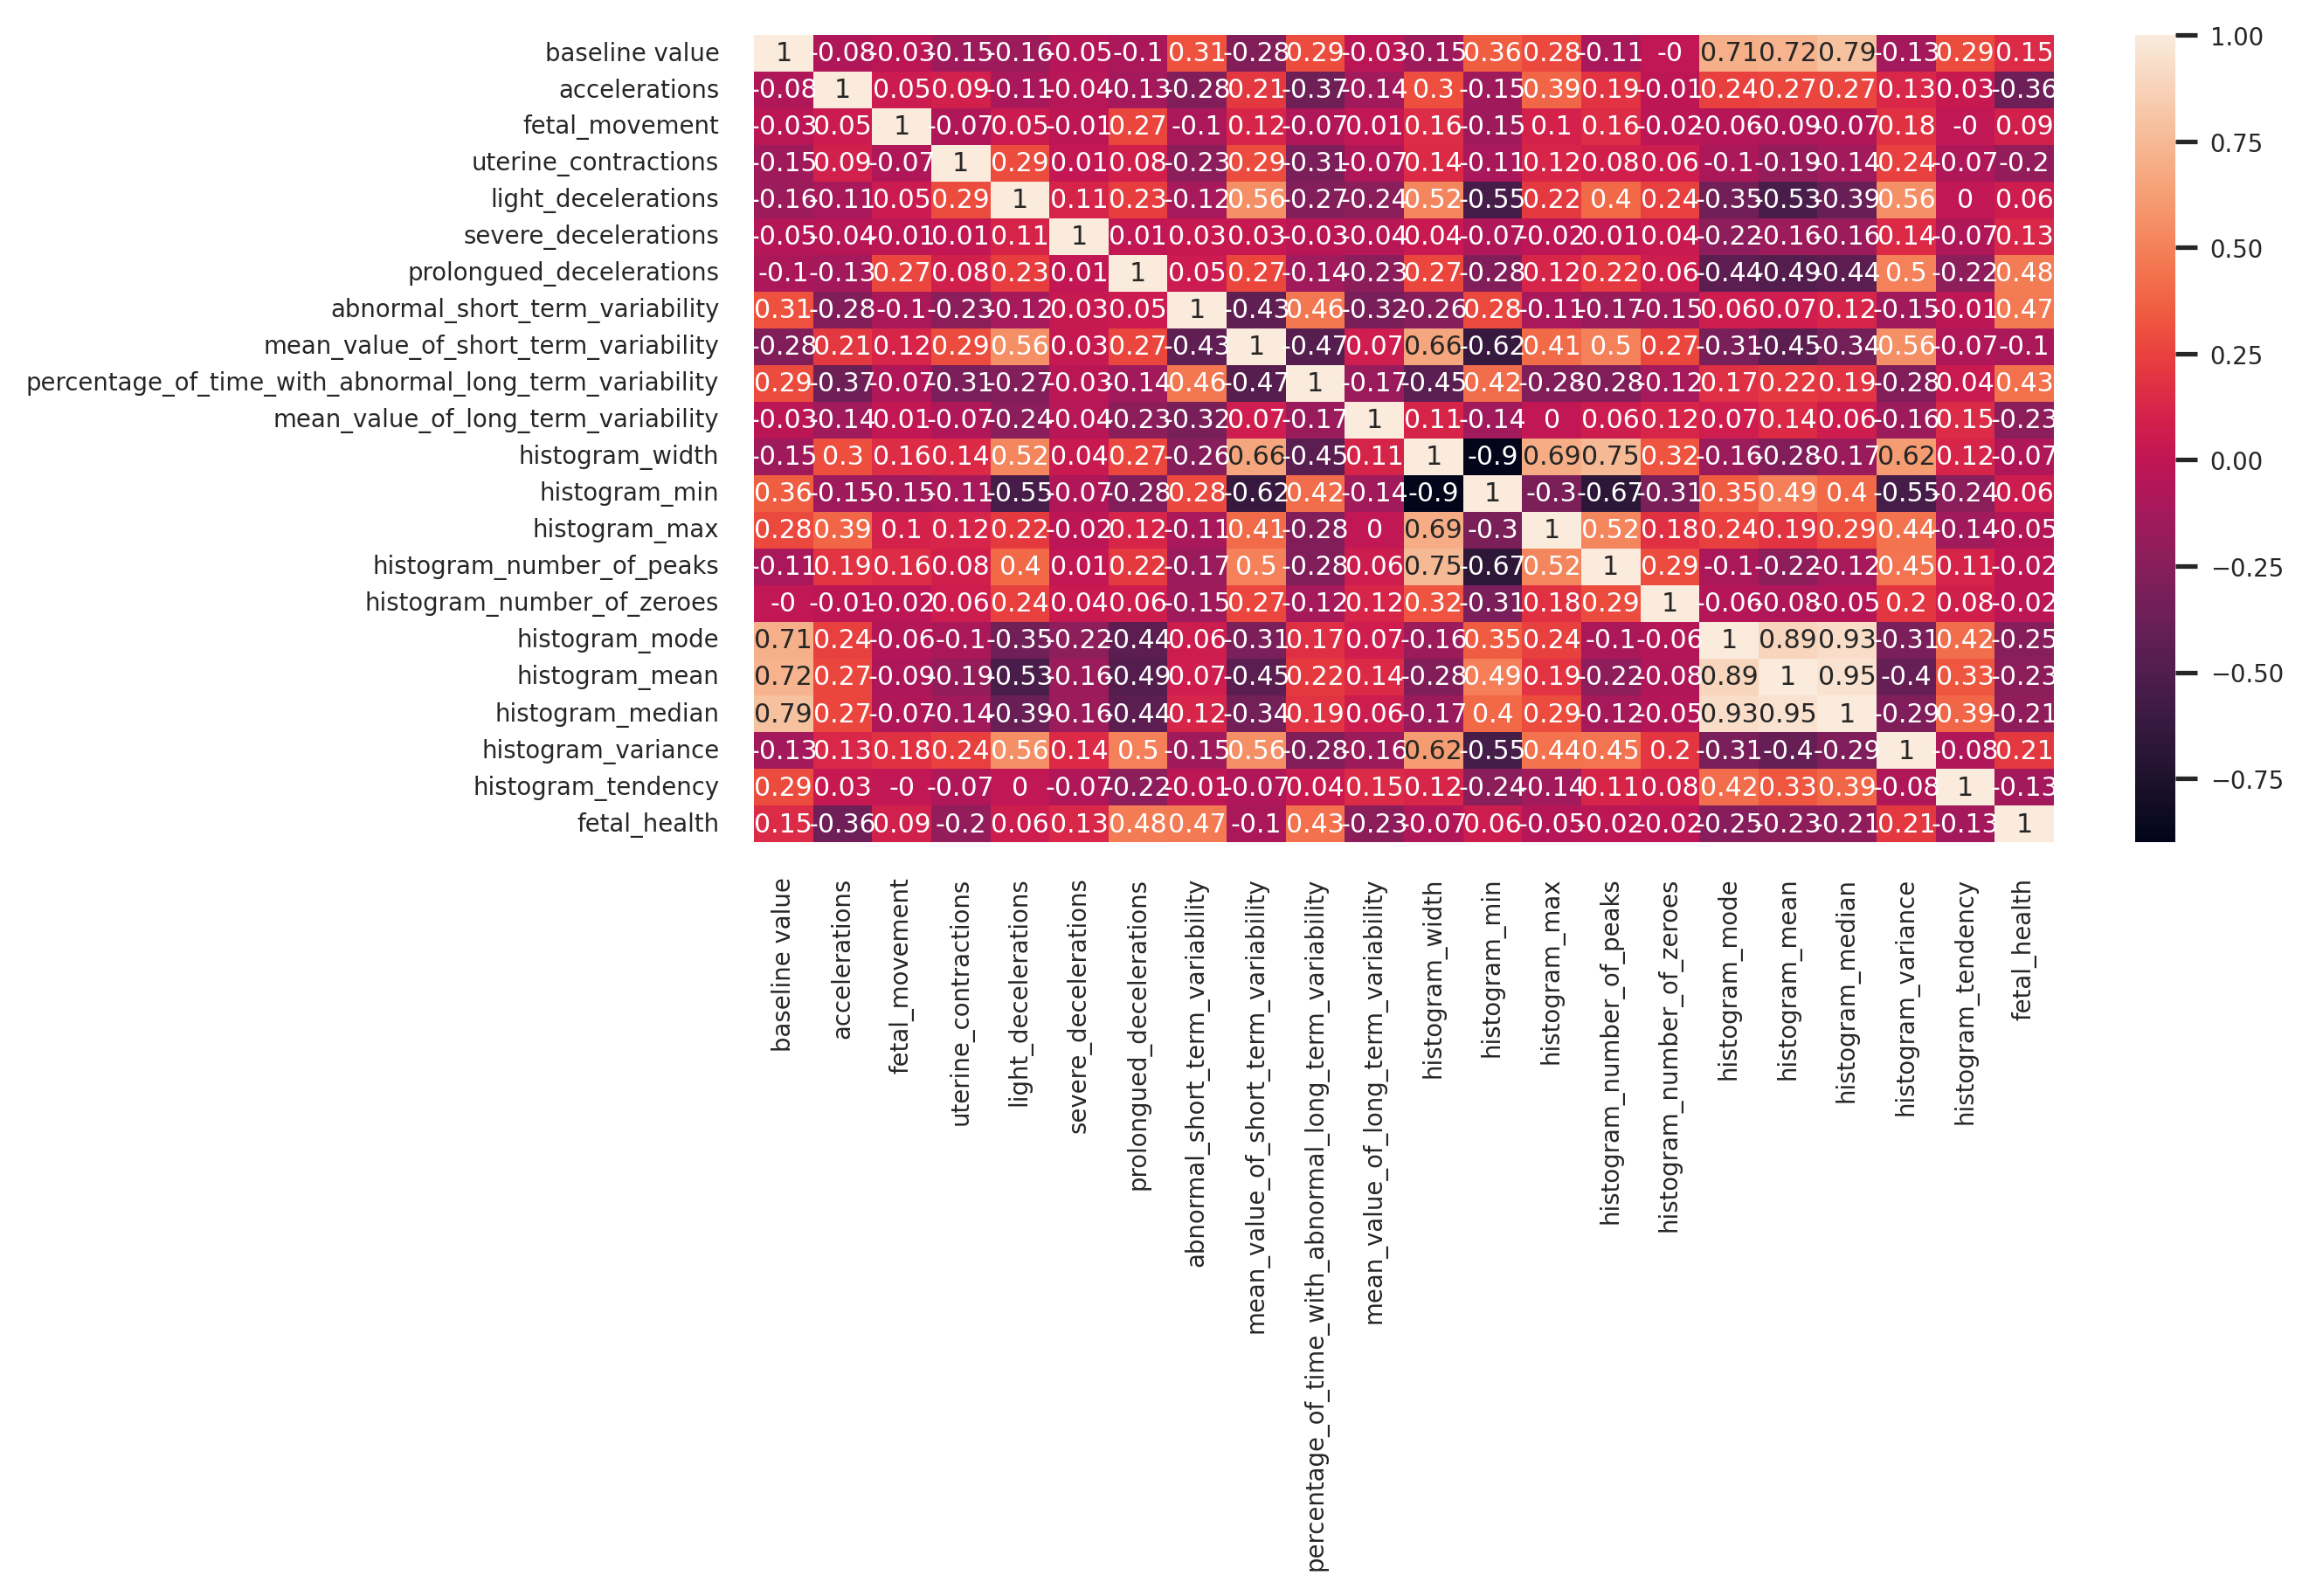

In [13]:
#Correlation HeatMap
sns.set(rc={'figure.figsize':(8,4), "figure.dpi":300})
sns.set_theme(font_scale=0.6)
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

### Preparing The Data for the model creation

In [14]:
# Standardise the Data
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(df.drop(["fetal_health"],axis = 1),), columns = columns)

In [15]:
# Standardised Variables
X

baseline value  accelerations  fetal_movement  uterine_contractions   
0          -1.352220      -0.822388       -0.203210             -1.482465  \
1          -0.132526       0.730133       -0.203210              0.554627   
2          -0.030884      -0.046128       -0.203210              1.233657   
3           0.070757      -0.046128       -0.203210              1.233657   
4          -0.132526       0.988886       -0.203210              1.233657   
...              ...            ...             ...                   ...   
2121        0.680604      -0.822388       -0.203210              0.894142   
2122        0.680604      -0.563635       -0.203210              0.894142   
2123        0.680604      -0.563635       -0.203210              0.894142   
2124        0.680604      -0.563635       -0.203210              0.554627   
2125        0.883886      -0.304881       -0.160342              1.233657   

      light_decelerations  severe_decelerations  prolongued_decelerations   
0               -0.638438             -0.057476                 -0.268754  \
1                0.375243             -0.057476                 -0.268754   
2                0.375243             -0.057476                 -0.268754   
3                0.375243             -0.057476                 -0.268754   
4               -0.638438             -0.057476                 -0.268754   
...                   ...                   ...                       ...   
2121            -0.638438             -0.057476                 -0.268754   
2122            -0.638438             -0.057476                 -0.268754   
2123            -0.638438             -0.057476                 -0.268754   
2124            -0.638438             -0.057476                 -0.268754   
2125            -0.638438             -0.057476                 -0.268754   

      abnormal_short_term_variability  mean_value_of_short_term_variability   
0                            1.513190                             -0.943095  \
1                           -1.744751                              0.868841   
2                           -1.802928                              0.868841   
3                           -1.802928                              1.208579   
4                           -1.802928                              1.208579   
...                               ...                                   ...   
2121                         1.862255                             -1.282833   
2122                         1.804078                             -1.056341   
2123                         1.862255                             -1.056341   
2124                         1.804078                             -1.056341   
2125                         1.571368                             -1.056341   

      percentage_of_time_with_abnormal_long_term_variability  ...   
0                                              1.802542       ...  \
1                                             -0.535361       ...   
2                                             -0.535361       ...   
3                                             -0.535361       ...   
4                                             -0.535361       ...   
...                                                 ...       ...   
2121                                           0.823885       ...   
2122                                           0.660775       ...   
2123                                           0.552035       ...   
2124                                           0.932624       ...   
2125                                           1.421953       ...   

      histogram_width  histogram_min  histogram_max   
0           -0.165507      -1.068562      -2.119592  \
1            1.529124      -0.865539       1.893794   
2            1.529124      -0.865539       1.893794   
3            1.195333      -1.373097       0.333033   
4            1.195333      -1.373097       0.333033   
...               ...            ...            

In [16]:
# Split the Data for Train and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    df.iloc[:, -1], 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=df.iloc[:, -1])

In [17]:
# XGBoost requires categories to be recoded
Y_train = Y_train.astype(int).replace({1:0, 2:1, 3:2})
Y_test = Y_test.astype(int).replace({1:0, 2:1, 3:2})

In [18]:
# Create the XGBClassifier
xgb1 = xgb.XGBClassifier(objective="multi:softmax", seed=42, num_class=3, early_stopping_rounds=10, eval_metric="aucpr")

In [19]:
# Fit the classifier
xgb1.fit(X_train, Y_train, eval_set=[(X_test, Y_test)] )

[0]	validation_0-aucpr:0.88592
[1]	validation_0-aucpr:0.87682
[2]	validation_0-aucpr:0.88090
[3]	validation_0-aucpr:0.89761
[4]	validation_0-aucpr:0.90052
[5]	validation_0-aucpr:0.90820
[6]	validation_0-aucpr:0.91682
[7]	validation_0-aucpr:0.92231
[8]	validation_0-aucpr:0.92319
[9]	validation_0-aucpr:0.92454
[10]	validation_0-aucpr:0.92706
[11]	validation_0-aucpr:0.92862
[12]	validation_0-aucpr:0.92845
[13]	validation_0-aucpr:0.93102
[14]	validation_0-aucpr:0.93412
[15]	validation_0-aucpr:0.93432
[16]	validation_0-aucpr:0.93439
[17]	validation_0-aucpr:0.93421
[18]	validation_0-aucpr:0.93477
[19]	validation_0-aucpr:0.93199
[20]	validation_0-aucpr:0.93279
[21]	validation_0-aucpr:0.93315
[22]	validation_0-aucpr:0.93476
[23]	validation_0-aucpr:0.93283
[24]	validation_0-aucpr:0.93311
[25]	validation_0-aucpr:0.93265
[26]	validation_0-aucpr:0.93253
[27]	validation_0-aucpr:0.93189
[28]	validation_0-aucpr:0.93096


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

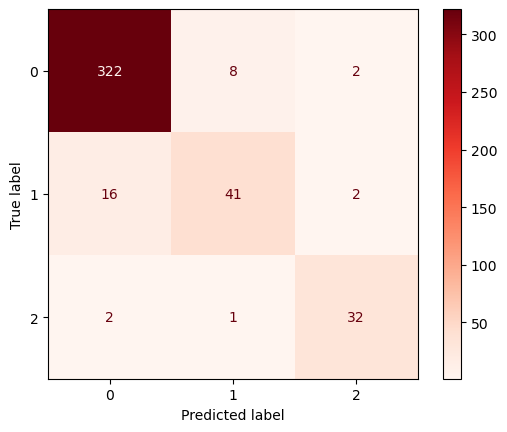

In [20]:
# Confusion Matrix of the first model
sns.reset_orig()
ConfusionMatrixDisplay.from_estimator(xgb1, X_test, Y_test, cmap="Reds")
plt.show()

In [21]:
predict_acc1 = (pd.Series(xgb1.predict(X_test)) == Y_test.reset_index(drop=True)).sum()/Y_test.count()
print("The Accuracy of the model =", predict_acc1)

The Accuracy of the model = 0.9272300469483568


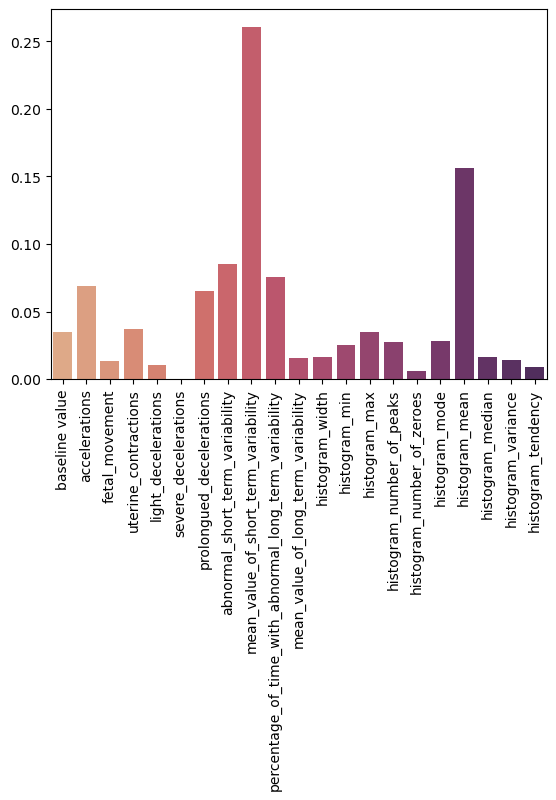

In [22]:
# The feature importance for the first model
fig1 = sns.barplot(x=X_train.columns, y=xgb1.feature_importances_, palette="flare", order=X_train.columns)
fig1.set_xticklabels(fig1.get_xticklabels(),rotation='vertical')
plt.show()

In [23]:
# Set the parametres for first GridSearchCV
param_test1 = {
    "eta": [0.05, 0.1, 0.2, 0.3, 0.4], 
    "max_depth": [4, 5, 6, 7], 
    "min_child_weight": [1, 3, 5], 
    "lambda": [0, 1, 10],
    "gamma": [0, 0.25, 1]
}

In [24]:
# Creat the first GridSearch
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1,
                        n_jobs=-1,verbose = 10, cv=5)

In [25]:
# Fir the gridsearch
gsearch1.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[CV 2/5; 1/540] START eta=0.05, gamma=0, lambda=0, max_depth=4, min_child_weight=1
[CV 5/5; 1/540] START eta=0.05, gamma=0, lambda=0, max_depth=4, min_child_weight=1
[CV 3/5; 1/540] START eta=0.05, gamma=0, lambda=0, max_depth=4, min_child_weight=1
[CV 4/5; 1/540] START eta=0.05, gamma=0, lambda=0, max_depth=4, min_child_weight=1
[CV 1/5; 1/540] START eta=0.05, gamma=0, lambda=0, max_depth=4, min_child_weight=1
[CV 4/5; 2/540] START eta=0.05, gamma=0, lambda=0, max_depth=4, min_child_weight=3
[CV 5/5; 2/540] START eta=0.05, gamma=0, lambda=0, max_depth=4, min_child_weight=3
[0]	validation_0-aucpr:0.83283
[1]	validation_0-aucpr:0.83389
[2]	validation_0-aucpr:0.83464
[3]	validation_0-aucpr:0.83796
[4]	validation_0-aucpr:0.83802
[5]	validation_0-aucpr:0.83910[0]	validation_0-aucpr:0.83122
[1]	validation_0-aucpr:0.81696
[6]	validation_0-aucpr:0.84312
[7]	validation_0-aucpr:0.84558
[CV 2/5; 3/540] START eta=0.05, gamma=0, lambda=0, max_depth=4, min_child_weight=5
[8]	validation_0-aucpr:0.84

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='aucpr', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.05, 0.1, 0.2, 0.3, 0.4],
                         'gamma': [0, 0.25, 1], 'lambda': [0, 1, 10],
                         'max_depth': [4, 5, 6, 7],
                         'min_child_weight': [1, 3, 5]},
             verbose=10)

In [26]:
# Display the best parametres and the best score
gsearch1.best_score_, gsearch1.best_params_

(0.9529411764705882,
 {'eta': 0.3, 'gamma': 0, 'lambda': 10, 'max_depth': 7, 'min_child_weight': 1})

In [27]:
# Set the parametres for the 2nd GridSearch
param_test2 = {
    "eta": [0.01, 0.05, 0.1], 
    "max_depth": [5, 7, 9,], 
    "min_child_weight": [2, 3, 4], 
    "lambda": [0],
    "gamma": [0, 0.25]
}

In [28]:
gsearch2 = GridSearchCV(estimator = xgb1, param_grid = param_test2,
                        n_jobs=-1,verbose = 10, cv=5)
gsearch2.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START eta=0.01, gamma=0, lambda=0, max_depth=5, min_child_weight=2
[CV 2/5; 1/54] START eta=0.01, gamma=0, lambda=0, max_depth=5, min_child_weight=2
[CV 3/5; 1/54] START eta=0.01, gamma=0, lambda=0, max_depth=5, min_child_weight=2
[0]	validation_0-aucpr:0.85310
[1]	validation_0-aucpr:0.85192
[0]	validation_0-aucpr:0.83638
[0]	validation_0-aucpr:0.83777
[2]	validation_0-aucpr:0.85644
[1]	validation_0-aucpr:0.84843
[1]	validation_0-aucpr:0.84938[3]	validation_0-aucpr:0.86120

[2]	validation_0-aucpr:0.85131
[2]	validation_0-aucpr:0.84247
[3]	validation_0-aucpr:0.84438
[3]	validation_0-aucpr:0.85631
[CV 4/5; 1/54] START eta=0.01, gamma=0, lambda=0, max_depth=5, min_child_weight=2
[CV 5/5; 1/54] START eta=0.01, gamma=0, lambda=0, max_depth=5, min_child_weight=2
[4]	validation_0-aucpr:0.85458
[5]	validation_0-aucpr:0.85488
[6]	validation_0-aucpr:0.85498
[CV 1/5; 2/54] START eta=0.01, gamma=0, lambda=0, max_depth=5, 

[9]	validation_0-aucpr:0.82991
[1]	validation_0-aucpr:0.85052
[47]	validation_0-aucpr:0.88040
[3]	validation_0-aucpr:0.82828
[20]	validation_0-aucpr:0.89044
[42]	validation_0-aucpr:0.86373
[11]	validation_0-aucpr:0.88365
[48]	validation_0-aucpr:0.90199[3]	validation_0-aucpr:0.88347
[72]	validation_0-aucpr:0.87166
[CV 1/5; 10/54] END eta=0.01, gamma=0.25, lambda=0, max_depth=5, min_child_weight=2;, score=0.935 total time=   0.0s
[48]	validation_0-aucpr:0.88058
[CV 5/5; 11/54] END eta=0.01, gamma=0.25, lambda=0, max_depth=5, min_child_weight=3;, score=0.915 total time=   0.1s
[9]	validation_0-aucpr:0.87326
[21]	validation_0-aucpr:0.89175
[CV 1/5; 12/54] START eta=0.01, gamma=0.25, lambda=0, max_depth=5, min_child_weight=4
[2]	validation_0-aucpr:0.85133
[4]	validation_0-aucpr:0.82780
[83]	validation_0-aucpr:0.91670[73]	validation_0-aucpr:0.87099
[4]	validation_0-aucpr:0.88472
[49]	validation_0-aucpr:0.88092


[22]	validation_0-aucpr:0.89185
[43]	validation_0-aucpr:0.86373
[CV 5/5; 15/54] 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='aucpr', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.01, 0.05, 0.1], 'gamma': [0, 0.25],
                         'lambda': [0], 'max_depth': [5, 7, 9],
                         'min_child_weight': [2, 3, 4]},
             verbose=10)

In [29]:
# Display the best parametres and the best score
gsearch2.best_score_, gsearch2.best_params_

(0.9470588235294117,
 {'eta': 0.1,
  'gamma': 0.25,
  'lambda': 0,
  'max_depth': 5,
  'min_child_weight': 4})

In [30]:
xgb2 = xgb.XGBClassifier(objective="multi:softmax", seed=42, 
                         num_class=3, early_stopping_rounds=10, eval_metric="aucpr",
                        eta=0.1, reg_lambda=0, max_depth=4, min_child_weight=1)

In [31]:
xgb2.fit(X_train, Y_train, eval_set=[(X_test, Y_test)] )

[0]	validation_0-aucpr:0.80200
[1]	validation_0-aucpr:0.81512
[2]	validation_0-aucpr:0.81390
[3]	validation_0-aucpr:0.82091
[4]	validation_0-aucpr:0.81685
[5]	validation_0-aucpr:0.82207
[6]	validation_0-aucpr:0.82615
[7]	validation_0-aucpr:0.84207
[8]	validation_0-aucpr:0.87695
[9]	validation_0-aucpr:0.88682
[10]	validation_0-aucpr:0.88826
[11]	validation_0-aucpr:0.88989
[12]	validation_0-aucpr:0.89252
[13]	validation_0-aucpr:0.88632
[14]	validation_0-aucpr:0.88783
[15]	validation_0-aucpr:0.88703
[16]	validation_0-aucpr:0.87927
[17]	validation_0-aucpr:0.87886
[18]	validation_0-aucpr:0.88986
[19]	validation_0-aucpr:0.89786
[20]	validation_0-aucpr:0.89950
[21]	validation_0-aucpr:0.89932
[22]	validation_0-aucpr:0.89987
[23]	validation_0-aucpr:0.90042
[24]	validation_0-aucpr:0.90253
[25]	validation_0-aucpr:0.90366
[26]	validation_0-aucpr:0.90193
[27]	validation_0-aucpr:0.90407
[28]	validation_0-aucpr:0.90633
[29]	validation_0-aucpr:0.90665
[30]	validation_0-aucpr:0.90963


[31]	validation_0-aucpr:0.91066
[32]	validation_0-aucpr:0.91205
[33]	validation_0-aucpr:0.91126
[34]	validation_0-aucpr:0.91168
[35]	validation_0-aucpr:0.91479
[36]	validation_0-aucpr:0.91488
[37]	validation_0-aucpr:0.91787
[38]	validation_0-aucpr:0.91686
[39]	validation_0-aucpr:0.91821
[40]	validation_0-aucpr:0.91931
[41]	validation_0-aucpr:0.91978
[42]	validation_0-aucpr:0.91693
[43]	validation_0-aucpr:0.91843
[44]	validation_0-aucpr:0.91984
[45]	validation_0-aucpr:0.91884
[46]	validation_0-aucpr:0.91925
[47]	validation_0-aucpr:0.91897
[48]	validation_0-aucpr:0.91701
[49]	validation_0-aucpr:0.91868
[50]	validation_0-aucpr:0.91808
[51]	validation_0-aucpr:0.91828
[52]	validation_0-aucpr:0.91837
[53]	validation_0-aucpr:0.91907


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eta=0.1, eval_metric='aucpr',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, ...)

In [32]:
predict_acc2 = (pd.Series(xgb2.predict(X_test)) == Y_test.reset_index(drop=True)).sum()/Y_test.count()
print("The Accuracy of the model =", predict_acc2)

The Accuracy of the model = 0.9342723004694836


In [33]:
# Display the classification accuracy report
print(classification_report(pd.Series(xgb2.predict(X_test)), Y_test.reset_index(drop=True)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       340
           1       0.71      0.88      0.79        48
           2       0.91      0.84      0.88        38

    accuracy                           0.93       426
   macro avg       0.87      0.89      0.88       426
weighted avg       0.94      0.93      0.94       426



The model predicts the fetal health with 94% accuracy

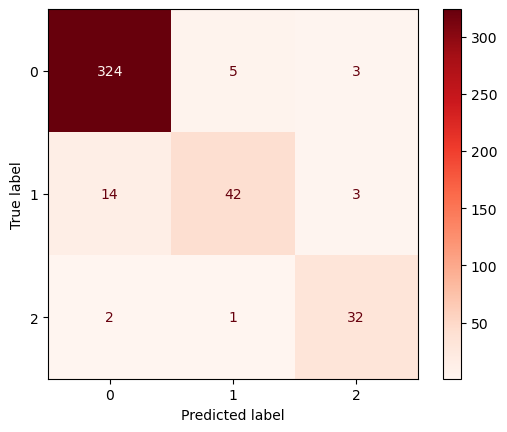

In [34]:
# Creat the confusion matrix
sns.reset_orig()
ConfusionMatrixDisplay.from_estimator(xgb2, X_test, Y_test, cmap="Reds")
plt.show()

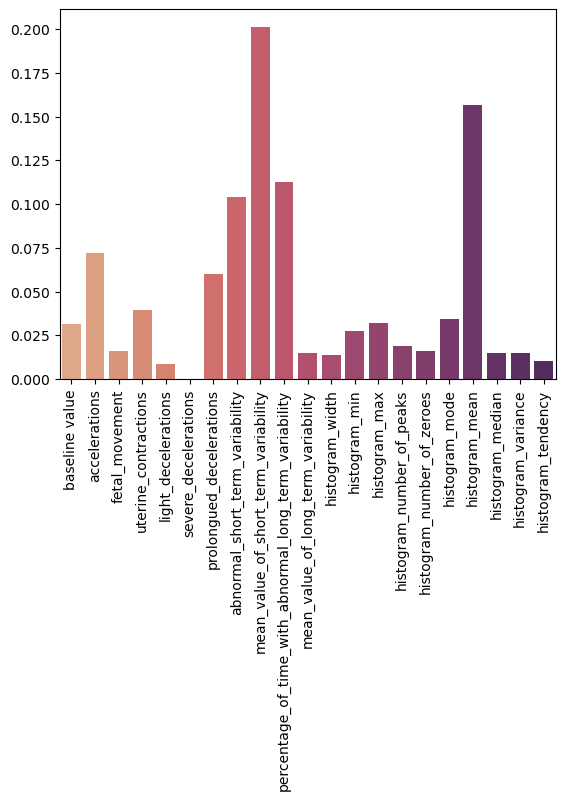

In [35]:
# Create the feature importance plot for improved model
fig2 = sns.barplot(x=X_train.columns, y=xgb2.feature_importances_, palette = "flare")
fig2.set_xticklabels(fig2.get_xticklabels(),rotation='vertical')
plt.show()

In [36]:
xgb2.save_model("XGB Fetal Health")

/home/lazydart/miniconda3/envs/tensorflow/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:59:45] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


I've succesfully created XGBoost model scoring 94% accuracy.